In [1]:
pip install keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)


In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 6s 0us/step


In [4]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
max([max(sequence) for sequence in train_data])


9999

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [19]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [20]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 146ms/step - loss: 0.5576 - acc: 0.7645 - val_loss: 0.4387 - val_acc: 0.8330
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3524 - acc: 0.8895 - val_loss: 0.3453 - val_acc: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2624 - acc: 0.9157 - val_loss: 0.3007 - val_acc: 0.8830
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2118 - acc: 0.9299 - val_loss: 0.2779 - val_acc: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1761 - acc: 0.9420 - val_loss: 0.2820 - val_acc: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1500 - acc: 0.9509 - val_loss: 0.2846 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1282 - acc: 0.9589 - val_loss: 0.2978 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1113 - 

In [23]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

C:\Users\Student-PC\AppData\Local\Temp\ipykernel_12928\2154614739.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color=(0.4, 0.6, 1.0, 1))


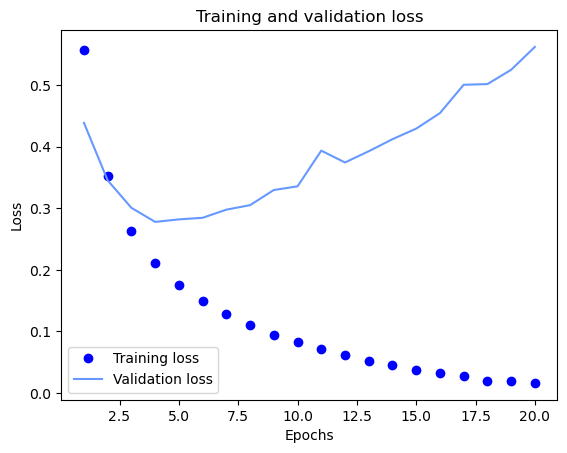

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color=(0.4, 0.6, 1.0, 1))
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4574 - accuracy: 0.8203
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2737 - accuracy: 0.9034
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2150 - accuracy: 0.9228
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2856 - accuracy: 0.8858


In [27]:
model.predict(x_test)

782/782 [==============================] - 2s 1ms/step


array([[0.20362817],
       [0.9983653 ],
       [0.7263294 ],
       ...,
       [0.08809563],
       [0.06359623],
       [0.48716837]], dtype=float32)

In [31]:
pred =model.predict(x_test[:100])

4/4 [==============================] - 0s 1ms/step


In [34]:
np.where(pred>0.5,"positive","Negative")

array([['Negative'],
       ['positive'],
       ['positive'],
       ['positive'],
       ['positive'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['Negative'],
       ['Negative'],
       ['positive'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['positive'],
       ['Negative'],
       ['positive'],
       ['Negative'],
       ['Negative'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['positive'],
       ['positive'],
       ['positive'],
       ['Negative'],
       ['Nega

In [37]:
import pandas as pd
result=pd.DataFrame(pred,columns=["predicted col"])

In [38]:
result

,predicted col
0,0.203628
1,0.998365
2,0.726329
3,0.841283
4,0.940762
...,...
95,0.110624
96,0.873471
97,0.970988
98,0.119651


In [40]:
result["final"]=result["predicted col"].apply(lambda x:np.where(pred>0.5,"positive","Negative"))

,predicted col,final
0,0.203628,"[[Negative], [positive], [positive], [positive..."
1,0.998365,"[[Negative], [positive], [positive], [positive..."
2,0.726329,"[[Negative], [positive], [positive], [positive..."
3,0.841283,"[[Negative], [positive], [positive], [positive..."
4,0.940762,"[[Negative], [positive], [positive], [positive..."
...,...,...
95,0.110624,"[[Negative], [positive], [positive], [positive..."
96,0.873471,"[[Negative], [positive], [positive], [positive..."
97,0.970988,"[[Negative], [positive], [positive], [positive..."
98,0.119651,"[[Negative], [positive], [positive], [positive..."
